In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = '/content/drive/MyDrive/diabetes_prediction_dataset.csv'
df = pd.read_csv(data)

# **PERFORM EDA(Exploratory Data Analysis)**

Descriptive Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%      

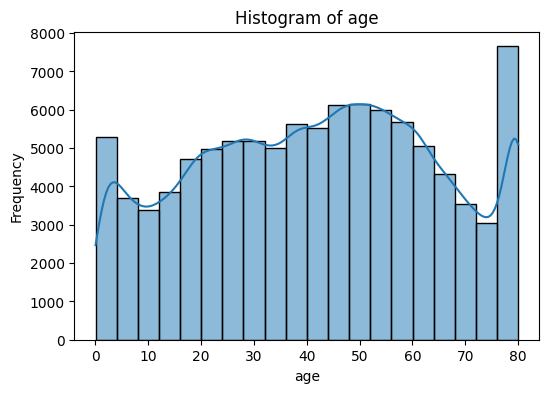

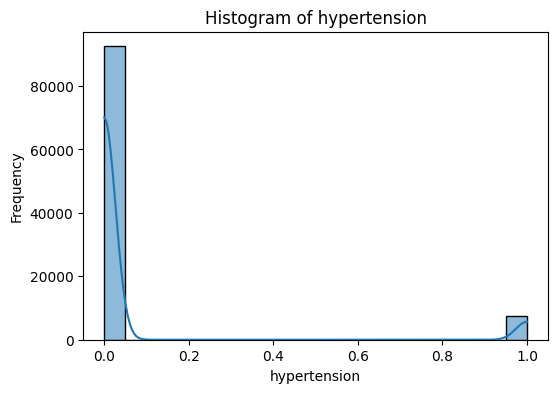

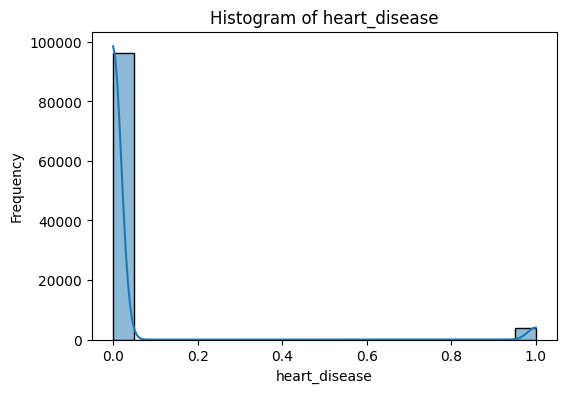

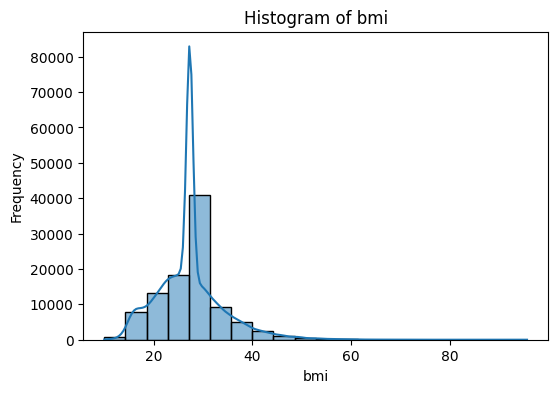

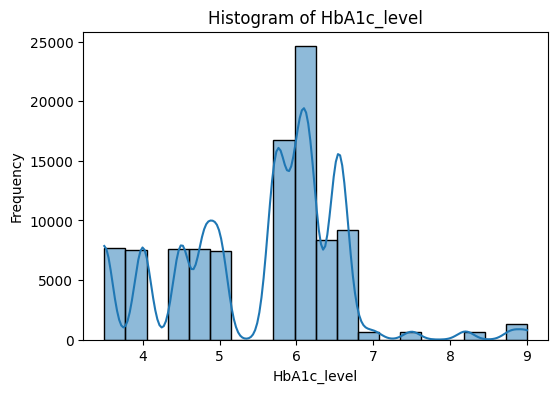

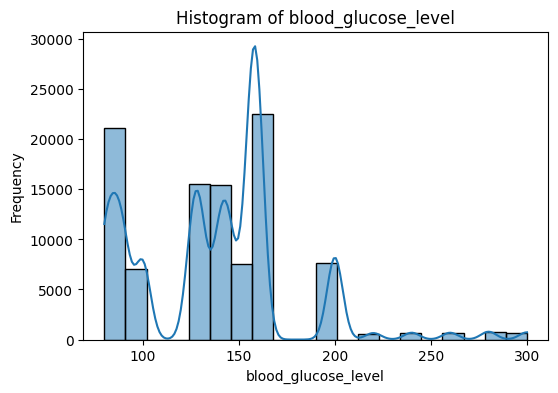

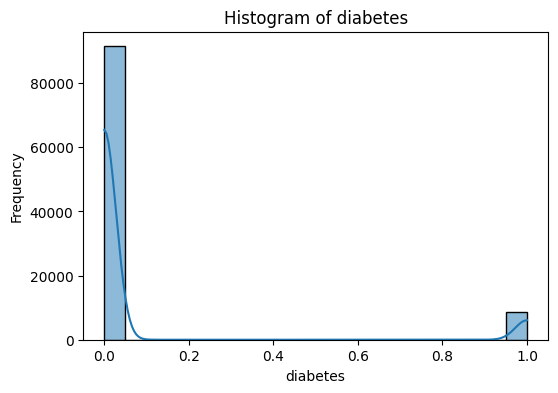


Bar Charts:


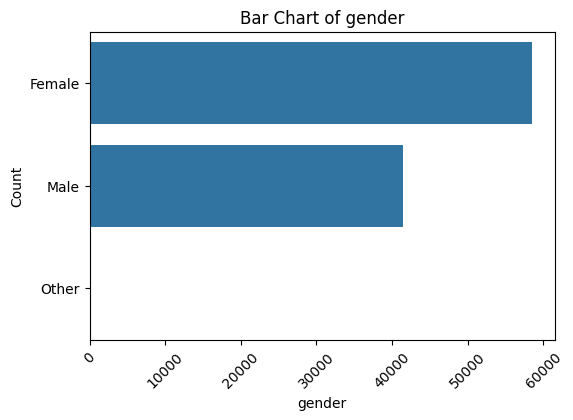

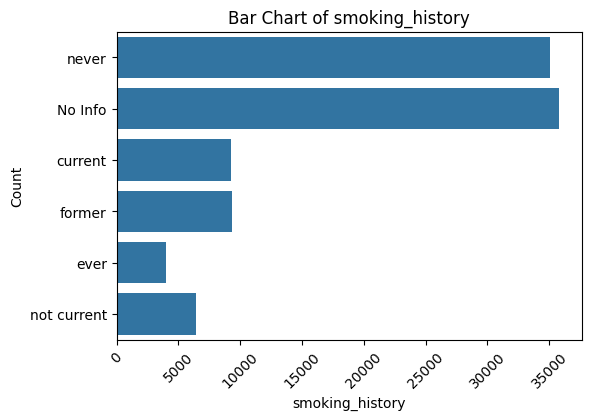

In [5]:
def EDA(data):
    # Statistics description like (mean, mode, median)
    print("Descriptive Statistics:")
    print(data.describe())

    # Histograms for numeric data
    print("\nHistograms:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Bar charts for categorical data and object type data
    print("\nBar Charts:")
    for column in data.columns:
        if isinstance(data[column].dtype, pd.CategoricalDtype):  # if categorical
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif data[column].dtype == 'object':  # object dtype for categorical variables
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()


EDA(df)

# **DATA PREPROCESSING**

In [6]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the categorical features
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Display the first few rows to see the encoded data
print(df[['gender', 'smoking_history']].head())


   gender  smoking_history
0       0                4
1       0                0
2       1                4
3       0                1
4       1                1


In [9]:

# Select features for scaling (all except the target variable)
X = df.drop('diabetes', axis=1)  # Drop the target column 'diabetes'
y = df['diabetes']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **DATA SPLIT**

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**# TRAIN MODEL**

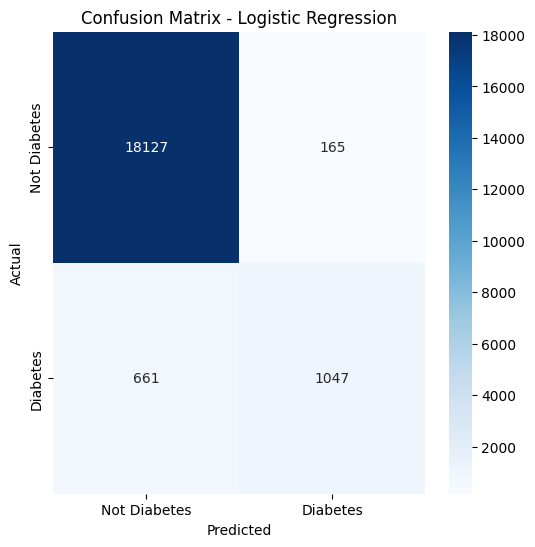

Logistic Regression Accuracy: 0.9587


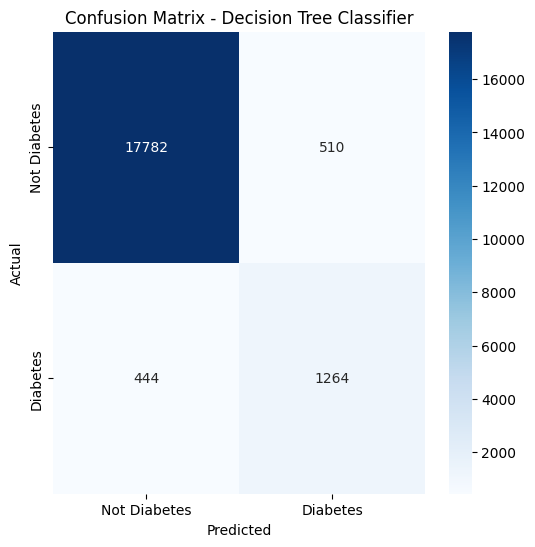

Decision Tree Classifier Accuracy: 0.9523


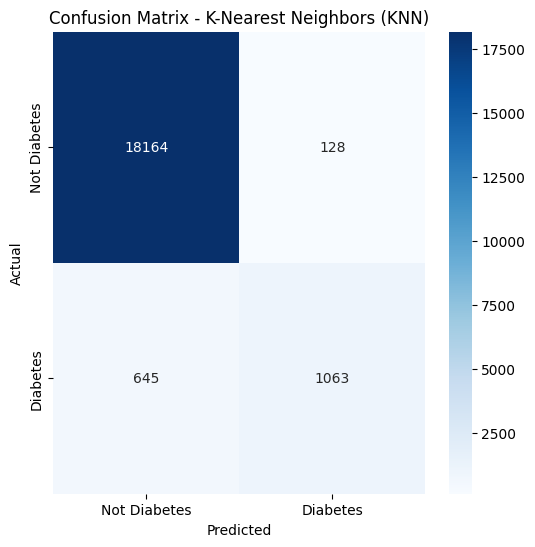

K-Nearest Neighbors (KNN) Accuracy: 0.96135


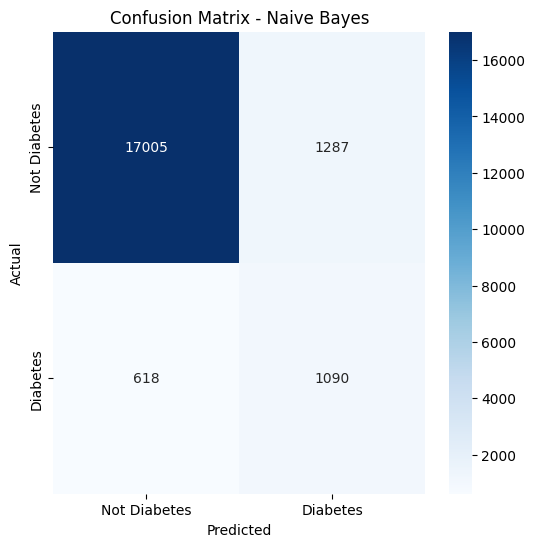

Naive Bayes Accuracy: 0.90475


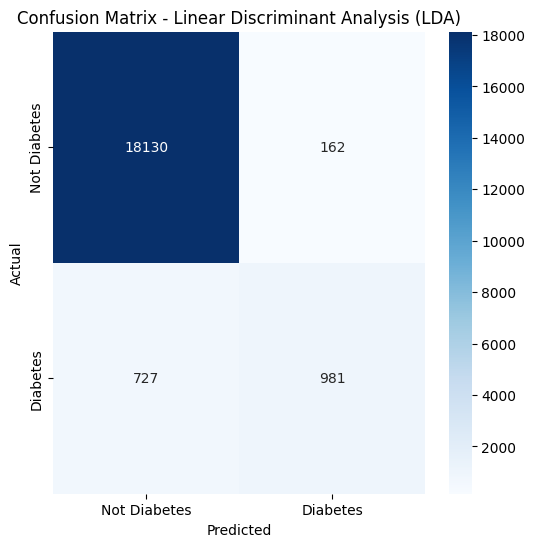

Linear Discriminant Analysis (LDA) Accuracy: 0.95555
Logistic Regression:
Accuracy: 0.9587
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Decision Tree Classifier:
Accuracy: 0.95265
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

K-Nearest Neighbors (KNN):
Accuracy: 0.96135
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

  

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis()
}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Optionally, you can also print the accuracy score for each model
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


# **MODEL COMPARSION**

                                Model  Accuracy
0                 Logistic Regression   0.95870
1            Decision Tree Classifier   0.95200
2           K-Nearest Neighbors (KNN)   0.96135
3                         Naive Bayes   0.90475
4  Linear Discriminant Analysis (LDA)   0.95555


<ipython-input-16-ca82d9077f42>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Blues_d')


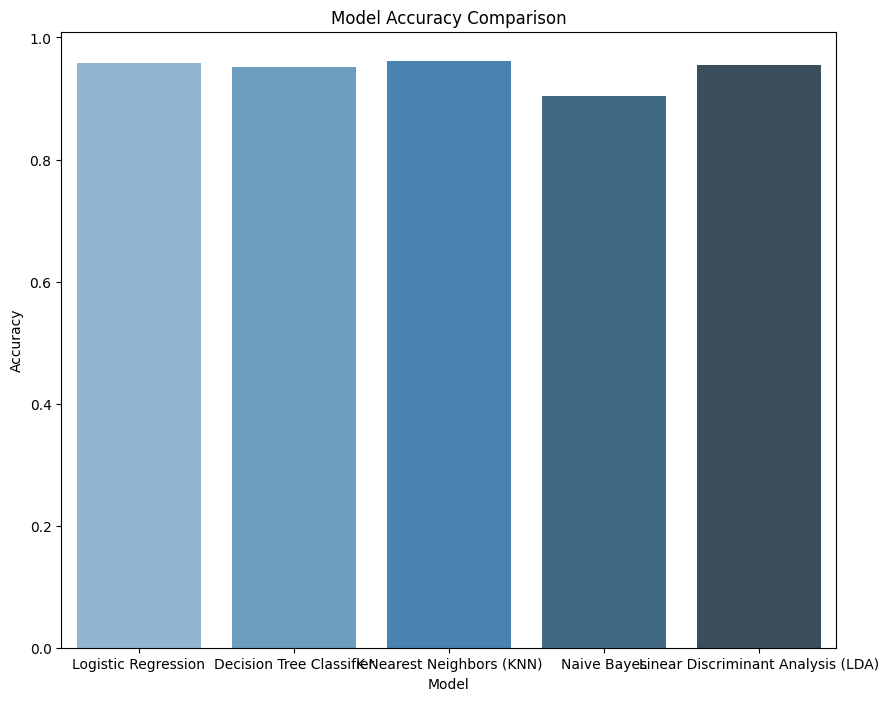

In [16]:
accuracy_results = []

# Loop through the models, train, predict, and collect accuracy
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Add the result to the accuracy_results list
    accuracy_results.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

# Convert the results to a DataFrame for better display
accuracy_df = pd.DataFrame(accuracy_results)

# Display the comparison table
print(accuracy_df)

# Optionally, plot the accuracy comparison
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()